Goal: Analyze relationship between 'TV advertising' and 'sales'

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Read CSV file

In [2]:
data = pd.read_csv('advertising.csv')

Check first 5 rows

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Check dimensions of data

In [4]:
data.shape

(200, 4)

Check type of each row

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Check for any null

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Assign X and Y variables

In [7]:
X = data['TV'].values.reshape(-1, 1)
Y = data['Sales']

Creating linear regression model

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Retrieving predictions

In [9]:
predictions = model.predict(X_test)

Plotting model

<function matplotlib.pyplot.show(close=None, block=None)>

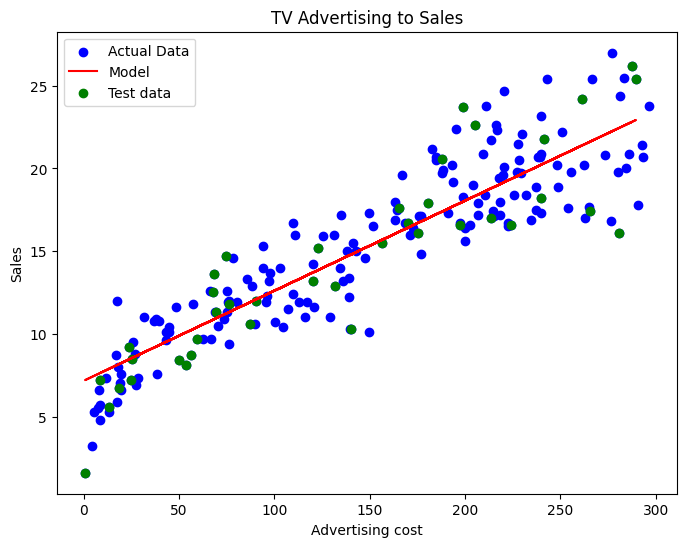

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_test, predictions, color='red', label='Model')
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.title('TV Advertising to Sales')
plt.xlabel('Advertising cost')
plt.ylabel('Sales')
plt.legend()
plt.show

Model metric scores

In [11]:
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 6.639091226559296
R2 Score: 0.8010943934328408


Testing model with user entries

In [12]:
user_input = int(input('How much money are you willing to spend on advertising?: '))
reshaped_user_input = np.array([[user_input]])
user_prediction = model.predict(reshaped_user_input)
print(f'You should expect to earn ${user_prediction} in sales from a budget of ${user_input}.')

You should expect to earn $[19.40999386] in sales from a budget of $225.
